# Correlation in Movies dataset

I was wondering what are some of the factors that contribute to a succesful movie, but assesing this information is not always easy. Some movies become massive hits in the theaters, but some others are an acquired taste and become cult movies despite the fact of having little budgets and even worse revenue.

With that in mind I found this dataset in Kaggle with the help of one of my mentors Alex the Analyst and I tried to answer some questions. Does a big budget translate to a big revenue? Do the user score of a movie relates in any way in the monetary success of a production? Does the director or the star of the movie correlates with the revenue of the movie?

The dataset was found in [Kaggle](https://www.kaggle.com/datasets/danielgrijalvas/movies) and was scrapped from IMBd, the project is based and guided by Alex the Analyst in his [Youtube Channel](https://www.youtube.com/watch?v=iPYVYBtUTyE&list=PLUaB-1hjhk8H48Pj32z4GZgGWyylqv85f&index=5)

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure 


%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) 
# rcParams Configures all the plots we're going to make to this exact size

In [2]:
# Reading the data with pandas

movies = pd.read_csv('D:\Portfolio Projects\Movies Python\movies.csv')

movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
movies.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
# Let's find out the percentage of missing data in each column

for col in movies.columns:
    percent_missing = np.mean(movies[col].isnull())
    print('{} - {}%'.format(col, round(percent_missing*100,2)))

name - 0.0%
rating - 1.0%
genre - 0.0%
year - 0.0%
released - 0.03%
score - 0.04%
votes - 0.04%
director - 0.0%
writer - 0.04%
star - 0.01%
country - 0.04%
budget - 28.31%
gross - 2.46%
company - 0.22%
runtime - 0.05%


In [6]:
missing_data = movies[(movies['gross'].isnull()) | (movies['budget'].isnull())]

In [7]:
# We drop the data from the 
movies.drop(missing_data.index, inplace = True)

for col in movies.columns:
    percent_missing = np.mean(movies[col].isnull())
    print('{} - {}%'.format(col, round(percent_missing*100,2)))

name - 0.0%
rating - 0.22%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.02%
budget - 0.0%
gross - 0.0%
company - 0.04%
runtime - 0.02%


In [8]:
# We can change the data types of the columns budget and gross, so they become integers and not floats
movies.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [9]:
movies['budget'] = movies['budget'].astype('int64')

movies['gross'] = movies['gross'].astype('int64')

movies.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [10]:
# The year column doesn't match with the year shown on the released column in all the movies, let's fix that

movies[movies['released'].astype('string').str.extract(pat = '([0-9]{4})').astype('int').squeeze() != movies['year']]



,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0
11,The Gods Must Be Crazy,PG,Adventure,1980,"October 26, 1984 (United States)",7.3,54000.0,Jamie Uys,Jamie Uys,N!xau,South Africa,5000000,30031783,C.A.T. Films,109.0
21,Heaven's Gate,R,Adventure,1980,"April 24, 1981 (United States)",6.8,14000.0,Michael Cimino,Michael Cimino,Kris Kristofferson,United States,44000000,3484523,Partisan Productions,219.0
33,Cattle Annie and Little Britches,PG,Drama,1980,"April 24, 1981 (United States)",6.1,604.0,Lamont Johnson,David Eyre,Scott Glenn,United States,5100000,534816,Cattle Annie Productions,97.0
96,The Evil Dead,NC-17,Horror,1981,"April 15, 1983 (United States)",7.5,192000.0,Sam Raimi,Sam Raimi,Bruce Campbell,United States,350000,2956630,Renaissance Pictures,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7427,Stan & Ollie,PG,Biography,2018,"January 11, 2019 (United Kingdom)",7.2,34000.0,Jon S. Baird,Jeff Pope,Steve Coogan,United Kingdom,10000000,24420923,Entertainment One,98.0
7432,Dragon Ball Super: Broly,PG,Animation,2018,"January 16, 2019 (United States)",7.8,24000.0,Tatsuya Nagamine,Akira Toriyama,Masako Nozawa,Japan,8500000,115757940,Toei Company,100.0
7462,1917,R,Drama,2019,"January 10, 2020 (United States)",8.3,473000.0,Sam Mendes,Sam Mendes,Dean-Charles Chapman,United States,95000000,384623579,Dreamworks Pictures,119.0
7525,Weathering with You,PG-13,Animation,2019,"January 17, 2020 (United States)",7.5,28000.0,Makoto Shinkai,Makoto Shinkai,Kotaro Daigo,Japan,11100000,193457467,"""Weathering With You"" Film Partners",112.0


In [11]:
movies['year'] = movies['released'].astype('string').str.extract(pat = '([0-9]{4})').astype('int')

In [12]:
movies[movies['released'].astype('string').str.extract(pat = '([0-9]{4})').astype('int').squeeze() != movies['year']]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


<AxesSubplot:>

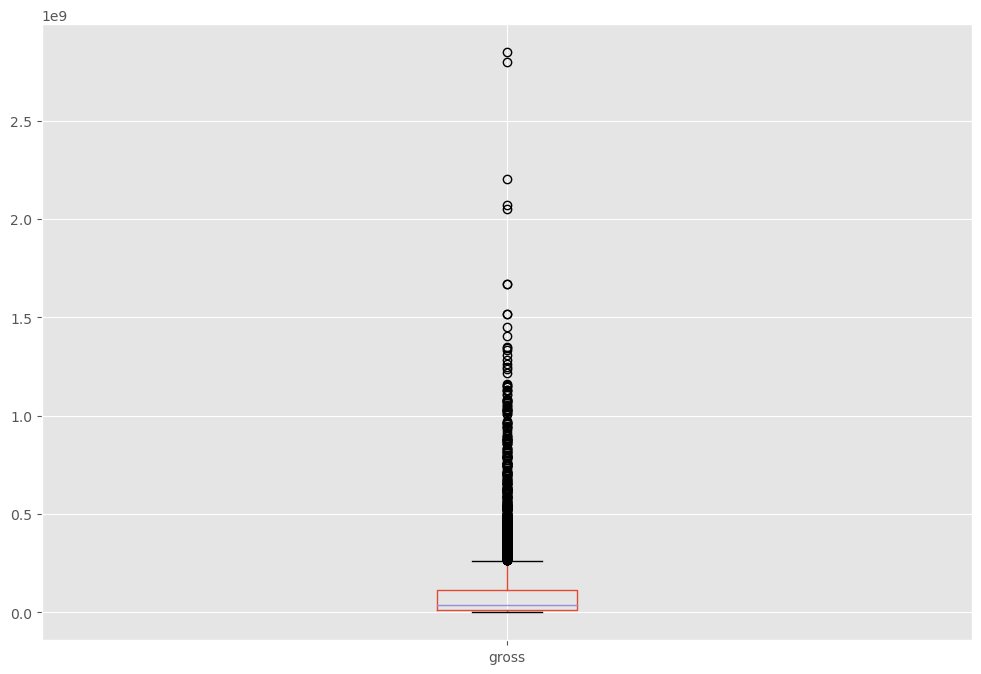

In [13]:
'''Let's take a look in the whole dataset sorted by the gross income of every movie,
To make sense of the data and to see if there are outliers and try to understand them'''

movies.boxplot(column=['gross'])

<AxesSubplot:>

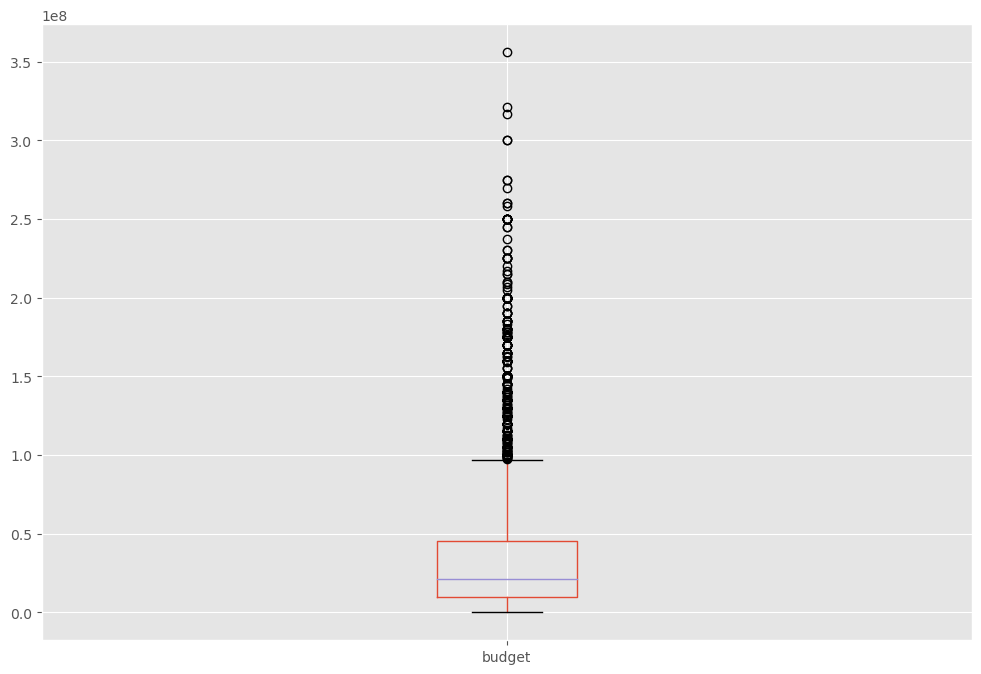

In [14]:
movies.boxplot(column=['budget'])

In [15]:
'''There are various values that could be considered outliers, 
but they seem to be accurate and not worthy of dropping in the columns gross and budget
'''
movies.sort_values(by = ['gross'], inplace = False, ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,Philadelphia Experiment II,PG-13,Action,1994,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0
3681,Ginger Snaps,Not Rated,Drama,2001,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0
2417,Madadayo,NaN,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0


In [16]:
# Duplicates can get disorted results, let's see if there's any

print('Movies shape: ', movies.shape)

movies[movies.duplicated()]

# There are no duplicates

Movies shape:  (5436, 15)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


Let's see the distribution of different variables so later check correlation accordingly.

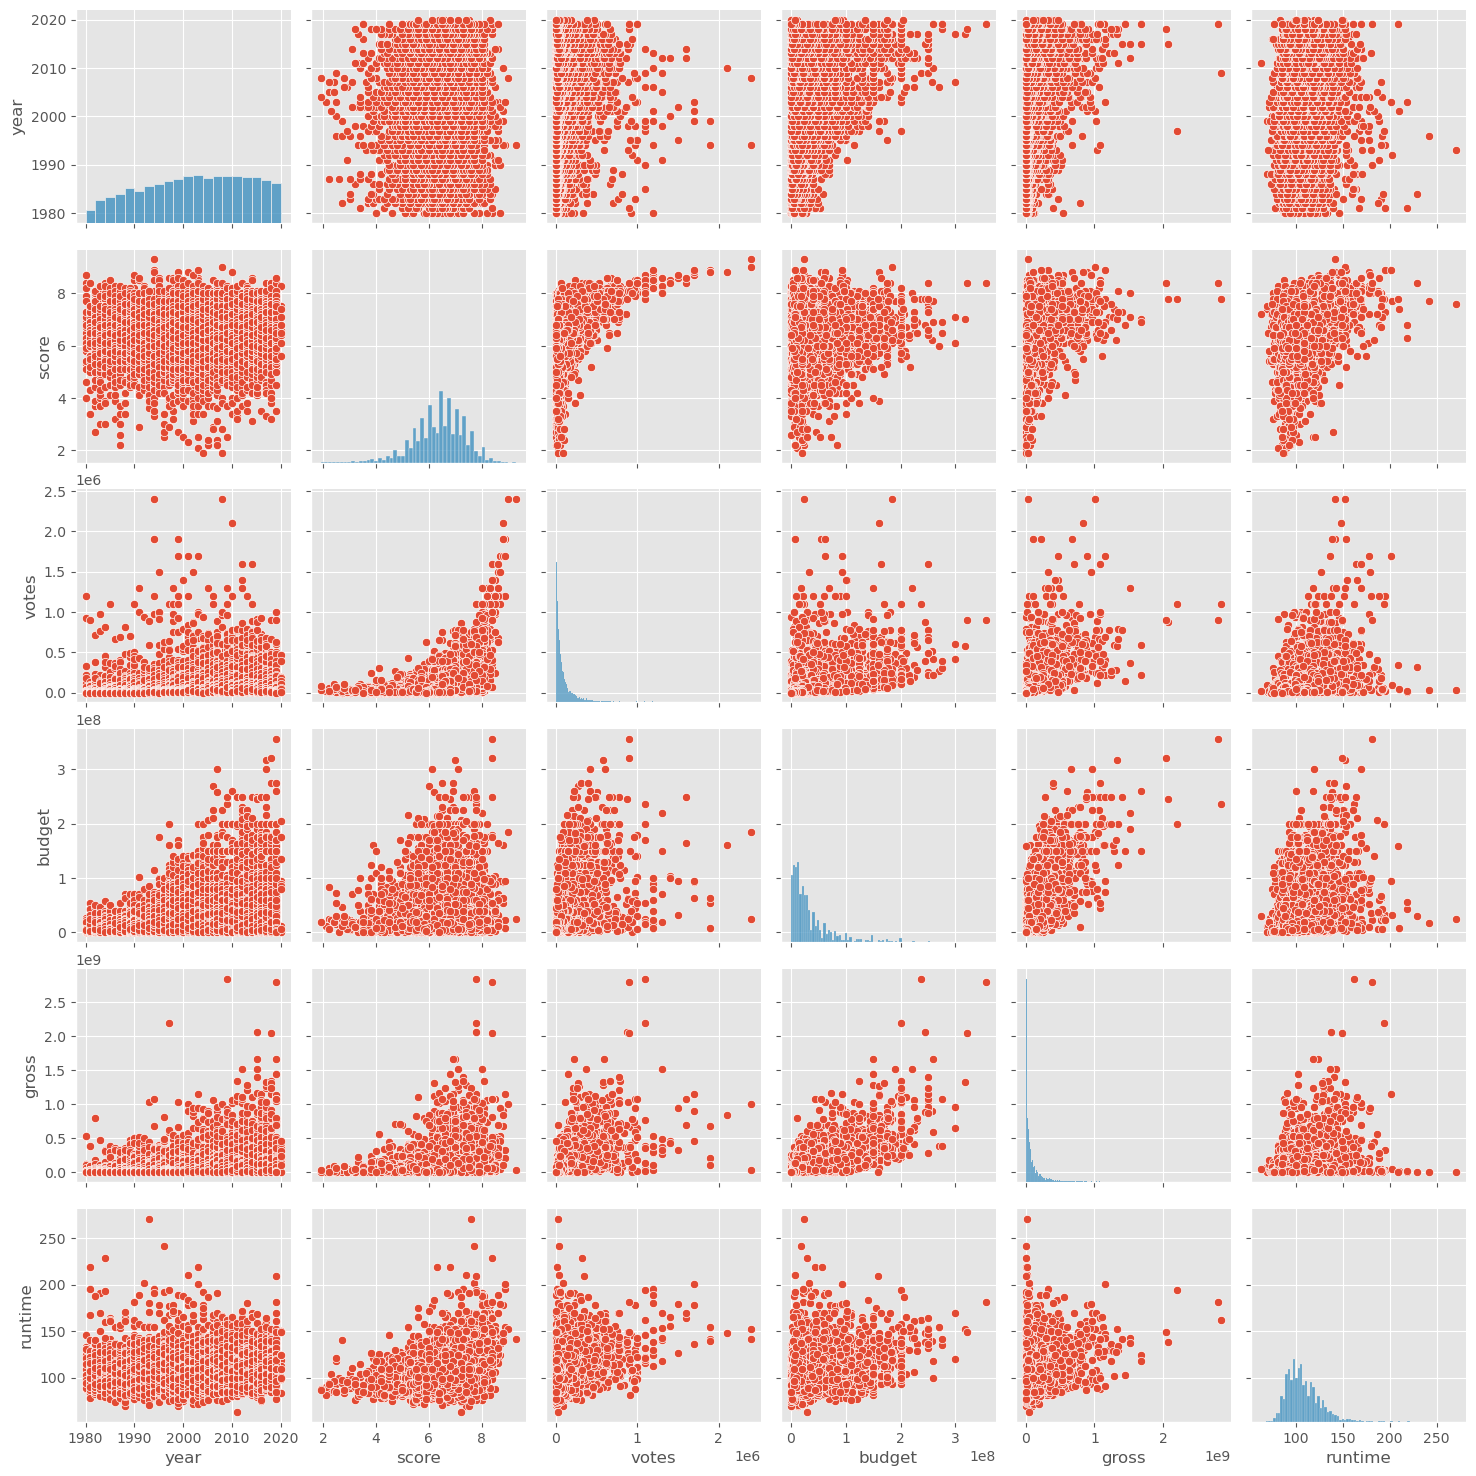

In [17]:
sns.pairplot(movies)

We'll use Spearman correlation method instead of Pearson for two reasons, the gross revenue and budget contains outliers that if dropped would cause loss of important information(they are not misscalculated, they're just higher values than expected), and the gross revenue data is highly skewed to the left, Spearman correlation is more robust against outliers and works better with skewed datasets.

Answering questions:
1.  Does a big budget translate to a big revenue? 
2. Does budget translate in acceptance from the public? 
3. Does the director or the star of the movie correlates with the revenue of the movie?

Text(0, 0.5, 'Gross Revenue')

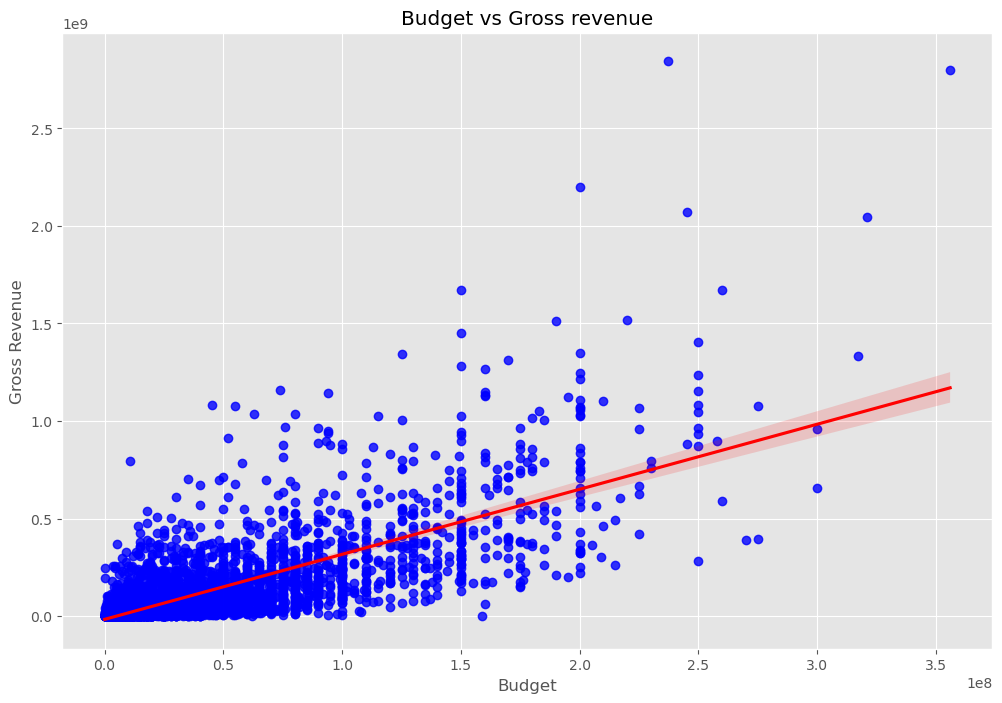

In [18]:
# 1. Does a big budget translate to a big revenue?
# Let's build a scatter plot of budget vs revenue

sns.regplot(x = movies['budget'], y = movies['gross'], scatter_kws={'color':'blue'}, 
            line_kws={'color':'red'})
plt.title('Budget vs Gross revenue')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')

Text(0, 0.5, 'Score by Users')

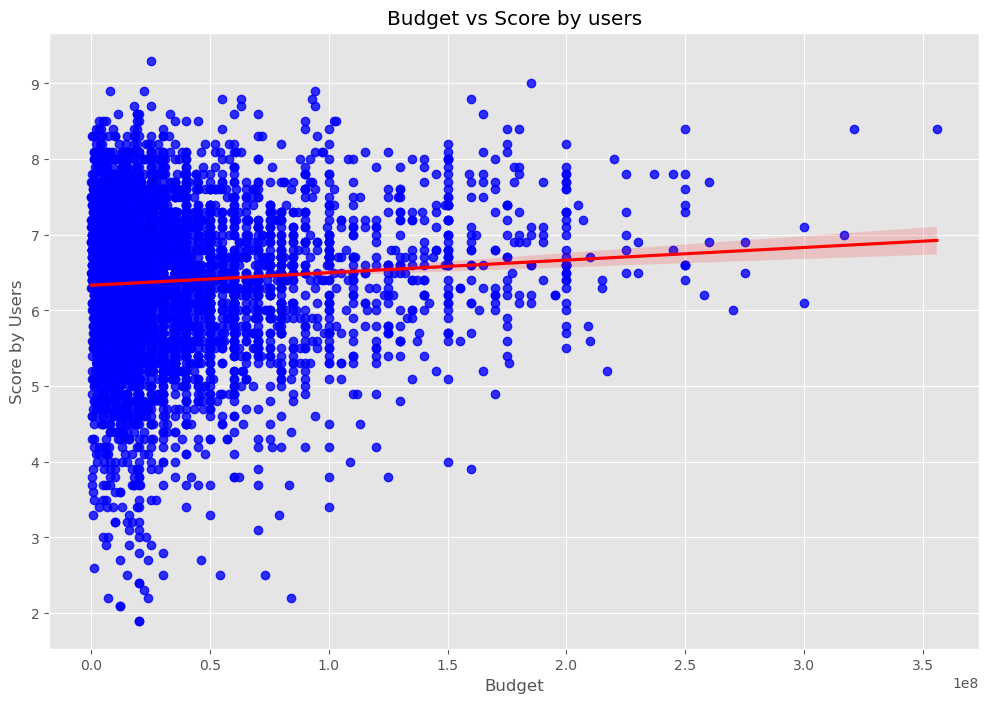

In [19]:
# 2. Do the user score of a movie relates in any way in the monetary success of a production?
sns.regplot(x = movies['budget'], y = movies['score'], scatter_kws={'color':'blue'}, 
            line_kws={'color':'red'})
plt.title('Budget vs Score by users')
plt.xlabel('Budget')
plt.ylabel('Score by Users')

In [20]:
# Visually it seems that budget is correlated with gross revenue, but not with the score of the movie.
correlation_matrix_numeric = movies.corr(method = 'spearman')

correlation_matrix_numeric

,year,score,votes,budget,gross,runtime
year,1.000000,0.062508,0.422187,0.302558,0.340211,0.094520
score,0.062508,1.000000,0.495379,-0.010133,0.182857,0.413040
votes,0.422187,0.495379,1.000000,0.493404,0.745815,0.300959
budget,0.302558,-0.010133,0.493404,1.000000,0.693670,0.330276
gross,0.340211,0.182857,0.745815,0.693670,1.000000,0.257121
runtime,0.094520,0.413040,0.300959,0.330276,0.257121,1.000000


1. A Spearman correlation of 0.69 states that the gross revenue of the movie is positively correlated with the budget, the more budget a movie has the bigger the revenue it'll get.

2. A Spearman correlation of 0.18 between the score and the budget implies that not necessarily a movie with a big budget translates to a good review from the critics, it's a low correlation.

Let's make this information more visual, using a heatmap!

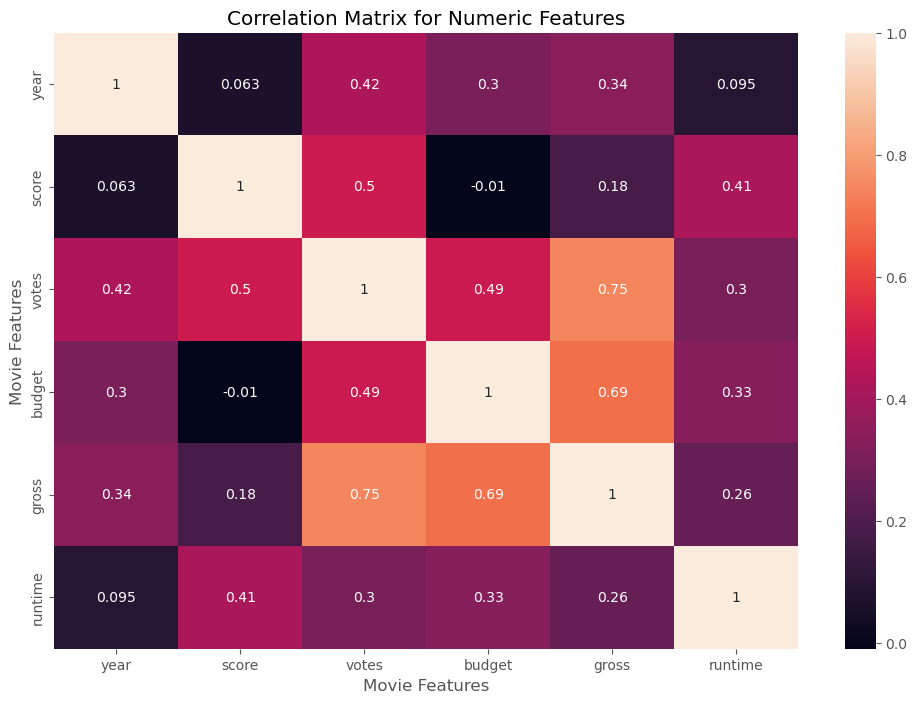

In [21]:
sns.heatmap(correlation_matrix_numeric, annot = True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

To answer question number three, it's important to find a way to make a comparison between numeric data and non numeric data, that's way it's necessary to make this non numeric data comparable. There's a way to do that, categorizing the data and then give a unique code to each category to find correlations in the data.

In [22]:
for col in movies.columns:
    if(movies[col].dtype == 'object'):
        movies[col+'_code'] = movies[col].astype('category')
        movies[col+'_code'] = movies[col+'_code'].cat.codes

movies

,name,rating,genre,year,released,score,votes,director,writer,star,...,runtime,name_code,rating_code,genre_code,released_code,director_code,writer_code,star_code,country_code,company_code
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,...,146.0,4706,6,6,1308,1800,2841,700,46,1432
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,...,104.0,3943,6,1,1131,1581,1160,215,47,454
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,...,124.0,3654,4,0,1363,759,1822,1161,47,949
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,...,88.0,205,4,4,1131,891,1416,1478,47,1114
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,...,98.0,734,6,4,1174,721,352,272,47,1089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,...,124.0,416,6,0,907,17,2397,1819,47,454
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,...,99.0,3569,4,0,715,854,2316,148,47,1114
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,...,101.0,1156,4,1,907,1814,2836,1474,47,1403
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,...,100.0,3992,4,1,760,296,2096,641,6,12


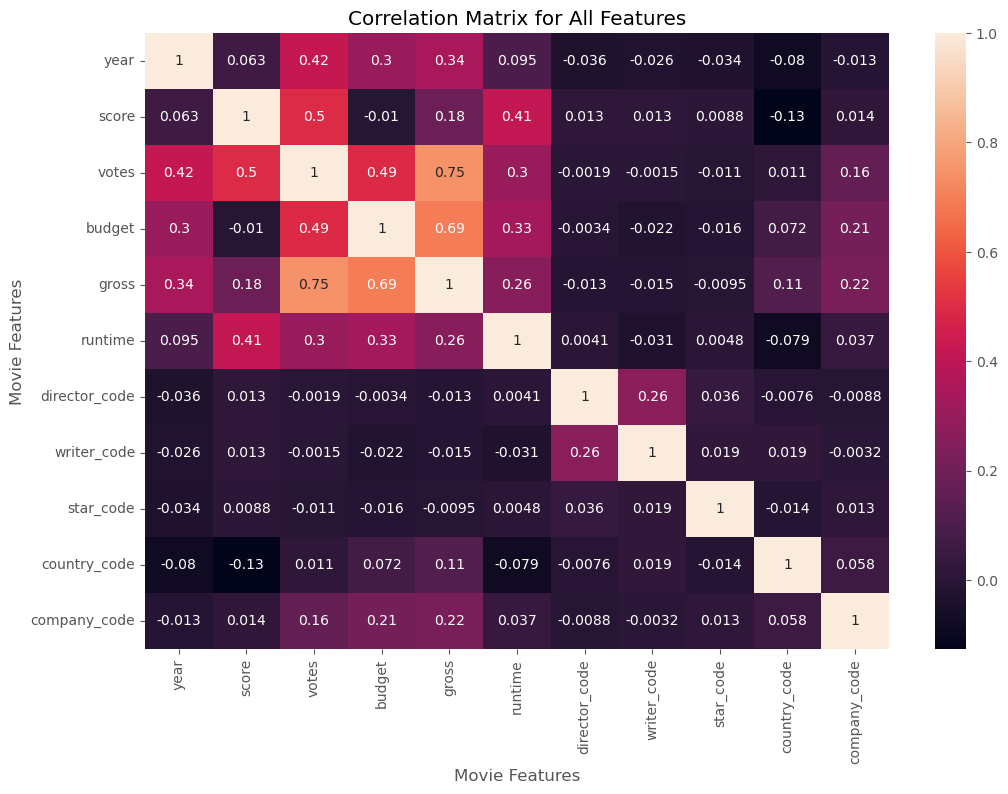

In [23]:
# 3. Does the director or the star of the movie correlates with the revenue of the movie?
correlation_matrix_all = movies.drop(columns = ['name_code', 'rating_code', 'genre_code', 'released_code'], 
                                     axis = 1).corr(method = 'spearman')

sns.heatmap(correlation_matrix_all, annot = True)
plt.title('Correlation Matrix for All Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

It seems that neither the Director(Correlation = -0.013) or the Star of the movie (Correlation = -0.0095) are highly correlated to the gross revenue that a movie gets after released.

To see it more clearly let's put it in a table unstack it.

In [24]:
corr_pairs = correlation_matrix_all.unstack()
corr_pairs

year          year             1.000000
              score            0.062508
              votes            0.422187
              budget           0.302558
              gross            0.340211
                                 ...   
company_code  director_code   -0.008813
              writer_code     -0.003248
              star_code        0.012508
              country_code     0.057682
              company_code     1.000000
Length: 121, dtype: float64

In [25]:
sorted_pairs = corr_pairs.sort_values(ascending = False)
sorted_pairs

year          year            1.000000
score         score           1.000000
country_code  country_code    1.000000
star_code     star_code       1.000000
writer_code   writer_code     1.000000
                                ...   
country_code  runtime        -0.078999
year          country_code   -0.080397
country_code  year           -0.080397
              score          -0.126607
score         country_code   -0.126607
Length: 121, dtype: float64

In [26]:
#Let's see only the ones that could be considered correlated

sorted_pairs[(abs(corr_pairs) > 0.5) & (abs(corr_pairs) < 1)]

gross   votes     0.745815
votes   gross     0.745815
budget  gross     0.693670
gross   budget    0.693670
dtype: float64

The gross revenue has a correlation with the amount of votes it gets, this may be because the more people that watch the movie, the more income the movie gets, and the chance of them voting the movi increases. Also as we previously find the budget is positively correlated with the gross revenue, the more money a movie gets for it's production, makes it more probable to succeed in the cinemas.